# SVM OPTIMISATION

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
data = pd.read_csv('avila.csv', header=None, names=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','Class'])
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


### Pre-processing the Dataset

In [3]:
data.shape

(10430, 11)

<AxesSubplot:xlabel='Class', ylabel='count'>

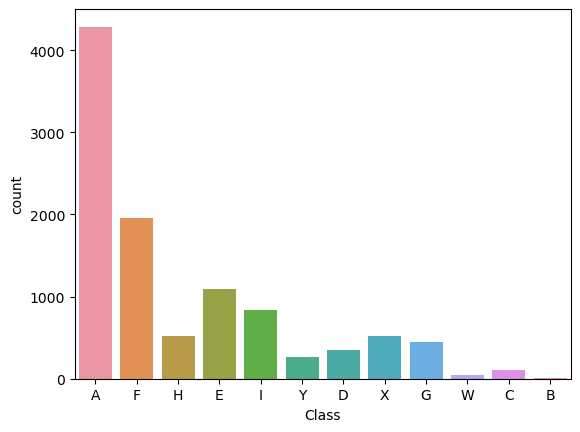

In [4]:
sns.countplot(x = 'Class', data=data)

In [5]:
X = data.iloc[:,0:-1]
y = data['Class']

In [6]:
ss = StandardScaler()
X = ss.fit_transform(X)

### Generating 10 Samples with 70-30 Split Raio

In [7]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [8]:
samples

[(array([[ 0.01850399, -0.09487042, -0.31939312, ..., -0.04668208,
          -3.22129012, -0.92180797],
         [ 0.23017378, -0.00876266,  0.15367282, ..., -0.0898687 ,
          -0.06763074, -0.35054986],
         [-0.33012688, -0.02878776,  0.21399697, ..., -0.12819712,
           0.41975294,  1.01444285],
         ...,
         [ 0.14301581, -0.04480793,  0.22034703, ...,  1.08959656,
           0.33374444, -0.32717059],
         [ 0.44184256,  0.06532983,  0.1282735 , ..., -0.35527168,
           0.27640513, -2.04335095],
         [-0.03130013, -0.02478284,  0.25527097, ...,  0.47532032,
          -0.69836225, -0.49172122]]),
  array([[ 8.15377006e-01, -5.08153093e-02,  2.35007651e-02, ...,
           4.17681695e-01,  1.36585112e+00,  4.76357024e-01],
         [-1.06006820e-01, -5.88253983e-02,  1.98122290e-01, ...,
          -4.70452270e-01, -3.25657186e-01,  9.26146953e-01],
         [-4.37514148e-02,  6.73325481e-02,  7.11248172e-02, ...,
           1.25488981e+00,  1.83777637

### Inistialising SVM Parameters and Optimisation Function

In [9]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best C', 'Best Gamma'])

def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calculating Optimised value for every sample

In [10]:
for i in range(len(samples)):
    best_C = 0
    best_gamma = 0
    best_accuracy = 0
    for kernel in kernels:
        X_train, X_test, y_train, y_test = samples[i]
        C = np.random.uniform(0, 10)
        gamma = np.random.uniform(0, 10)
        score = fitnessFunction(kernel, C, gamma)
        if score>best_accuracy:
            best_C = round(C, 2)
            best_gamma = round(gamma, 2)
            best_kernel = kernel
            best_accuracy = round(score, 2)
    print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best C = ', best_C, 'Best Gamma = ', best_gamma)
    result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.6 Best Kernel =  rbf Best C =  7.84 Best Gamma =  8.73
Best Accuracy =  0.55 Best Kernel =  rbf Best C =  0.83 Best Gamma =  9.05
Best Accuracy =  0.7 Best Kernel =  rbf Best C =  0.51 Best Gamma =  0.83
Best Accuracy =  0.65 Best Kernel =  rbf Best C =  1.04 Best Gamma =  4.29
Best Accuracy =  0.73 Best Kernel =  rbf Best C =  3.16 Best Gamma =  2.23
Best Accuracy =  0.49 Best Kernel =  rbf Best C =  0.22 Best Gamma =  9.85
Best Accuracy =  0.48 Best Kernel =  rbf Best C =  0.23 Best Gamma =  9.11
Best Accuracy =  0.73 Best Kernel =  rbf Best C =  5.24 Best Gamma =  2.17
Best Accuracy =  0.69 Best Kernel =  rbf Best C =  3.64 Best Gamma =  3.3
Best Accuracy =  0.37 Best Kernel =  rbf Best C =  1.62 Best Gamma =  0.0


In [11]:
print('The Final Result Table:')
result

The Final Result Table:


,Sample,Best Accuracy,Best Kernel,Best C,Best Gamma
0,1,0.60,rbf,7.84,8.73
1,2,0.55,rbf,0.83,9.05
2,3,0.70,rbf,0.51,0.83
3,4,0.65,rbf,1.04,4.29
4,5,0.73,rbf,3.16,2.23
5,6,0.49,rbf,0.22,9.85
6,7,0.48,rbf,0.23,9.11
7,8,0.73,rbf,5.24,2.17
8,9,0.69,rbf,3.64,3.30
9,10,0.37,rbf,1.62,0.00


### Convergence Graph

In [13]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [14]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best C'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Gamma'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), 
                                                        X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [17]:
test_mean = np.mean(test_scores, axis=1)

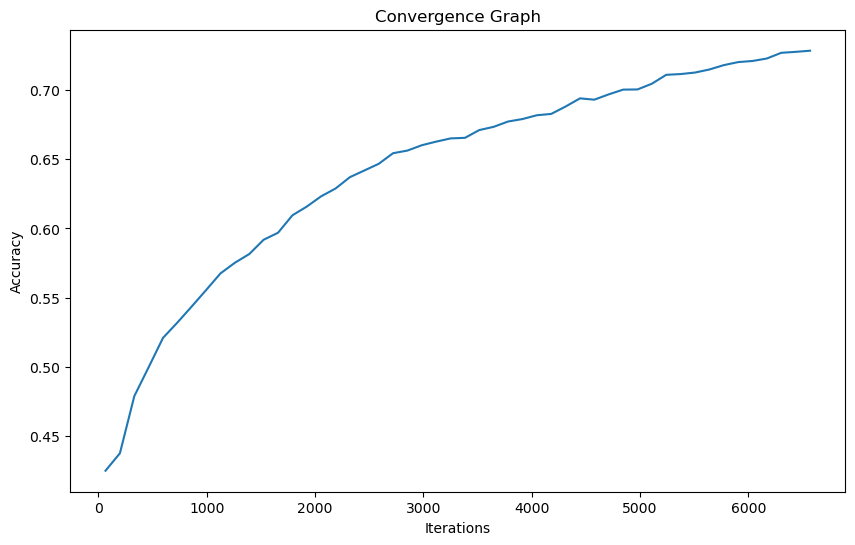

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, test_mean)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.show()